In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from functions_parameters.universal_parameters import a, b
from functions_parameters.tools import rot_symm_m_check_d, translation_check_d, array_print
from itertools import product

In [2]:
final_result = np.load('schf_fixed_u_filling_vhs_t_4_em4_mesh_30_2_2_pmap_over_v1_v2_seed_121.npz')


final_ground_state_e_diff_density = final_result['gse']
final_density = final_result['d']
final_bond = final_result['bond']
final_e_difference = final_result['e_diff']
final_c_difference = final_result['c_diff']
final_e_fermi = final_result['e_fermi']
final_iteration = final_result['iters']
any_bi_fail = final_result['any_bi_fail']

v1_arr = final_result['v1']
v2_arr = final_result['v2']
v1_mesh, v2_mesh = np.meshgrid(v1_arr, v2_arr, indexing = 'ij')

combine data points

In [3]:
final_result_111 = np.load('schf_fixed_u_filling_vhs_t_4_em4_random_basis_mesh_30_2_2_pmap_over_v1_v2.npz')


final_ground_state_e_diff_density_111 = final_result_111['gse']
final_density_111 = final_result_111['d']
final_bond_111 = final_result_111['bond']
final_e_difference_111 = final_result_111['e_diff']
final_c_difference_111 = final_result_111['c_diff']
final_e_fermi_111 = final_result_111['e_fermi']
final_iteration_111 = final_result_111['iters']
any_bi_fail_111 = final_result_111['any_bi_fail']

In [4]:
final_ground_state_e_diff_density = np.concatenate((final_ground_state_e_diff_density, final_ground_state_e_diff_density_111), axis=2)
final_density = np.concatenate((final_density, final_density_111), axis=2)
final_bond = np.concatenate((final_bond, final_bond_111), axis=2)
final_e_difference = np.concatenate((final_e_difference, final_e_difference_111), axis=2)
final_c_difference = np.concatenate((final_c_difference, final_c_difference_111), axis=2)
final_e_fermi = np.concatenate((final_e_fermi, final_e_fermi_111), axis=2)
final_iteration = np.concatenate((final_iteration, final_iteration_111), axis=2)
any_bi_fail = np.concatenate((any_bi_fail, any_bi_fail_111), axis=2)

In [5]:
np.max(final_c_difference)

np.float64(0.46565799780366696)

In [6]:
np.max(final_e_difference)

np.float64(0.0010287515268836422)

In [7]:
np.all(np.logical_not(any_bi_fail))

np.True_

### Some points do not converge

In [8]:
index_c_diff = np.where(np.abs(final_c_difference)>1E-4)
final_ground_state_e_diff_density[index_c_diff] = 0
index_e_diff = np.where(np.abs(final_e_difference)>1E-4)
final_ground_state_e_diff_density[index_e_diff] = 0

In [9]:
index_c_diff

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
         3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6, 

In [10]:
final_c_difference[index_c_diff]

array([2.48725469e-01, 2.48725469e-01, 2.48725469e-01, 2.48725469e-01,
       2.48725469e-01, 2.48725469e-01, 2.48725469e-01, 2.48725469e-01,
       2.48725469e-01, 2.48725469e-01, 2.48725469e-01, 2.48725469e-01,
       1.49914161e-01, 2.34823615e-01, 2.34823615e-01, 2.34823615e-01,
       2.34823615e-01, 2.34823615e-01, 2.34823615e-01, 2.34823615e-01,
       2.34823615e-01, 2.34823615e-01, 2.34823615e-01, 2.34823615e-01,
       2.34823615e-01, 2.09011168e-01, 2.09011168e-01, 2.09011168e-01,
       2.09011168e-01, 2.09011168e-01, 2.09011168e-01, 2.09011168e-01,
       2.09011168e-01, 2.09011168e-01, 2.09011168e-01, 2.09011168e-01,
       2.09011168e-01, 1.01219756e-01, 1.01219756e-01, 1.01219756e-01,
       1.01219756e-01, 1.01219756e-01, 1.01219756e-01, 1.01219756e-01,
       1.01219756e-01, 1.01219756e-01, 1.01219756e-01, 1.01219756e-01,
       1.01219756e-01, 1.20166533e-01, 1.20166533e-01, 1.20166533e-01,
       1.20166533e-01, 1.37766027e-01, 1.37766027e-01, 1.37766027e-01,
      

### Phase Analysis

In [11]:
translation_a1 = np.kron(np.array([[0,0,1,0],
                           [0,0,0,1],
                           [1,0,0,0],
                           [0,1,0,0]]), np.eye(3))
translation_a2 = np.kron(np.array([[0,1,0,0],
                           [1,0,0,0],
                           [0,0,0,1],
                           [0,0,1,0]]), np.eye(3))
translation_a3 = translation_a1 @ translation_a2
c_6_uc = np.array([[0,0,1],
                   [1,0,0],
                   [0,1,0]])
c_3_uc = c_6_uc@c_6_uc
c_2_uc = c_6_uc @ c_3_uc
c_6_2uc = np.zeros((12, 12))
c_6_2uc[0, 2] = 1
c_6_2uc[1, 6] = 1
c_6_2uc[2, 7] = 1
c_6_2uc[3, 8] = 1
c_6_2uc[4, 0] = 1
c_6_2uc[5, 1] = 1
c_6_2uc[6, -1] = 1
c_6_2uc[7, 3] = 1
c_6_2uc[8, 4] = 1
c_6_2uc[9, 5] = 1
c_6_2uc[10, -3] = 1
c_6_2uc[11, -2] = 1

c_6_2uc = np.moveaxis(np.reshape(c_6_2uc, (2, 2, 3, 2, 2, 3)), (0, 3), (1, 4)).reshape(12, 12)
c_3_2uc = c_6_2uc @ c_6_2uc
c_2_2uc = c_3_2uc @ c_6_2uc

In [12]:
# try define a translated rotation symmetry check operator such that we can check if the phase is genuine stripe orders.
c_6_2uc_gamma = np.zeros((12, 12))
c_6_2uc_gamma[1, 0] = 1
c_6_2uc_gamma[2, 1] = 1
c_6_2uc_gamma[6, 2] = 1
c_6_2uc_gamma[7, 3] = 1
c_6_2uc_gamma[8, 4] = 1
c_6_2uc_gamma[0, 5] = 1
c_6_2uc_gamma[10, 6] = 1
c_6_2uc_gamma[11, 7] = 1
c_6_2uc_gamma[3, 8] = 1
c_6_2uc_gamma[4, 9] = 1
c_6_2uc_gamma[5, 10] = 1
c_6_2uc_gamma[9, 11] = 1

In [13]:
c_6_2uc_y=np.zeros((12, 12))
c_6_2uc_y[10, 0] = 1
c_6_2uc_y[11, 1] = 1
c_6_2uc_y[3, 2] = 1
c_6_2uc_y[4, 3] = 1
c_6_2uc_y[5, 4] = 1
c_6_2uc_y[9, 5] = 1
c_6_2uc_y[1, 6] = 1
c_6_2uc_y[2, 7] = 1
c_6_2uc_y[6, 8] = 1
c_6_2uc_y[7, 9] = 1
c_6_2uc_y[8, 10] = 1
c_6_2uc_y[0, 11] = 1

In [14]:
c_6_2uc_x=np.zeros((12, 12))
c_6_2uc_x[4, 0] = 1
c_6_2uc_x[5, 1] = 1
c_6_2uc_x[9, 2] = 1
c_6_2uc_x[10, 3] = 1
c_6_2uc_x[11, 4] = 1
c_6_2uc_x[3, 5] = 1
c_6_2uc_x[7, 6] = 1
c_6_2uc_x[8, 7] = 1
c_6_2uc_x[0, 8] = 1
c_6_2uc_x[1, 9] = 1
c_6_2uc_x[2, 10] = 1
c_6_2uc_x[6, 11] = 1

In [15]:
c_3_2uc_gamma = c_6_2uc_gamma @ c_6_2uc_gamma
c_2_2uc_gamma = c_3_2uc_gamma @ c_6_2uc_gamma
c_3_2uc_x = c_6_2uc_x @ c_6_2uc_x
c_2_2uc_x = c_3_2uc_x @ c_6_2uc_x
c_3_2uc_y = c_6_2uc_y @ c_6_2uc_y
c_2_2uc_y = c_3_2uc_y @ c_6_2uc_y

In [16]:
ts_phase = ['', 'stripe', '2*2']
nematic_phase = [' R symmetric', ' C3 charge nematic', ' C2 charge nematic', ' no R']
# Magnetism_phase = [' +', ' FM', ' Ferri', ' AFM']
Magnetism_phase = [' +', ' -']

phase_list_final = list(i+j+m for i,j,m in product(ts_phase, nematic_phase, Magnetism_phase))

In [17]:
sorted_ground_state_e_index = np.argsort(final_ground_state_e_diff_density, axis=2)
sorted_ground_state_e= np.take_along_axis(final_ground_state_e_diff_density, sorted_ground_state_e_index, axis=2)
sorted_density = np.take_along_axis(final_density, sorted_ground_state_e_index[:,:,:,np.newaxis,np.newaxis], axis=2)
sorted_bond = np.take_along_axis(final_bond, sorted_ground_state_e_index[:,:,:,np.newaxis,np.newaxis,np.newaxis,np.newaxis,np.newaxis], axis=2)
sorted_e_difference = np.take_along_axis(final_e_difference, sorted_ground_state_e_index, axis=2)
sorted_c_difference = np.take_along_axis(final_c_difference, sorted_ground_state_e_index, axis=2)

In [18]:
phase_diagram_based_on_d = np.zeros((v1_mesh.shape))

threshold = 1E-2
for i in range(v1_mesh.shape[0]):
    for j in range(v1_mesh.shape[1]):
        print(i,j)
        d_ij = sorted_density[i,j,0]
        ts_recording = np.zeros((3),np.int32)
        rs_recording = np.zeros((4),np.int32)
        m_recording = np.zeros((2),np.int32)
        ts_diff_arr = translation_check_d(d_ij, translation_a1, translation_a2, translation_a3)
        if np.all(ts_diff_arr<threshold):
            ts_recording[0] = 1
        elif np.all(ts_diff_arr>threshold):
            ts_recording[-1] = 1
        else:
            ts_recording[1] = 1
        # if ts_recording[0]>0.5:
        #     d_ij = d_ij[:,:3]
        #     c6_diff, c3_diff, c2_diff, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_uc, c_3_uc, c_2_uc)
        # else:
        c6_diff_o, c3_diff_o, c2_diff_o, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_2uc, c_3_2uc, c_2_2uc)
        c6_diff_x, c3_diff_x, c2_diff_x, _ = rot_symm_m_check_d(d_ij, c_6_2uc_x, c_3_2uc_x, c_2_2uc_x)
        c6_diff_y, c3_diff_y, c2_diff_y, _ = rot_symm_m_check_d(d_ij, c_6_2uc_y, c_3_2uc_y, c_2_2uc_y)    
        c6_diff_gamma, c3_diff_gamma, c2_diff_gamma, _ = rot_symm_m_check_d(d_ij, c_6_2uc_gamma, c_3_2uc_gamma, c_2_2uc_gamma)
        c6_diff = np.min(np.abs(np.array([c6_diff_o, c6_diff_x, c6_diff_y, c6_diff_gamma])))
        c3_diff = np.min(np.abs(np.array([c3_diff_o, c3_diff_x, c3_diff_y, c3_diff_gamma])))
        c2_diff = np.min(np.abs(np.array([c2_diff_o, c2_diff_x, c2_diff_y, c2_diff_gamma])))
        print('c6_diff', c6_diff)
        print('c3_diff', c3_diff)
        print('c2_diff', c2_diff)
        if c6_diff<threshold:
            rs_recording[0] = 1
        elif c6_diff>threshold and c3_diff<threshold:
            rs_recording[1] = 1
        elif c2_diff<threshold and c6_diff>threshold:
            rs_recording[2] = 1
        else:
            rs_recording[3] = 1
        if np.max(np.abs(magnetism_arr)) > threshold:
            # if np.all(np.sign(np.real(magnetism_arr)) == 1) or np.all(np.sign(np.real(magnetism_arr)) == -1):
            #     m_recording[1] = 1
            # else:
                # net_m = np.sum(np.real(magnetism_arr))
                # if np.abs(net_m) <= threshold:
                #     m_recording[3] = 1
                # else:
                #     m_recording[2] = 1
            m_recording[1] = 1
        else:
            m_recording[0] = 1
        phase_arr = np.kron(ts_recording,rs_recording)
        phase_arr = np.kron(phase_arr,m_recording)
        phase = np.where(phase_arr>0.5)[0][0]
        print(phase_list_final[phase])
        
        phase_diagram_based_on_d[i,j]=phase

0 0
c6_diff 7.771561174399619e-16
c3_diff 4.996003645751796e-16
c2_diff 1.2767564820149688e-15
 R symmetric -
0 1
c6_diff 4.080103199743945e-09
c3_diff 4.080103477299701e-09
c2_diff 1.3738454818224515e-12
 R symmetric -
0 2
c6_diff 7.771561472936878e-16
c3_diff 8.881784359336055e-16
c2_diff 9.992007296625125e-16
 R symmetric -
0 3
c6_diff 6.6613381480815e-16
c3_diff 4.44089360495422e-16
c2_diff 1.387778781880055e-15
 R symmetric -
0 4
c6_diff 7.216449669096157e-16
c3_diff 5.55111521987805e-16
c2_diff 7.771561176116914e-16
 R symmetric -
0 5
c6_diff 4.42323072613604e-09
c3_diff 4.423230393069133e-09
c2_diff 2.9976021789884973e-15
 R symmetric -
0 6
c6_diff 0.05455601560183726
c3_diff 0.05455601560183726
c2_diff 0.05456375519534687
stripe no R -
0 7
c6_diff 0.07985816811299798
c3_diff 0.07985569330637196
c2_diff 0.162787620348061
2*2 no R -
0 8
c6_diff 0.10671837486197258
c3_diff 0.10671471769241503
c2_diff 0.21971773804081632
2*2 no R -
0 9
c6_diff 0.12741434943833985
c3_diff 0.12740994

Text(0.5, 1.0, 'filling = 0.8')

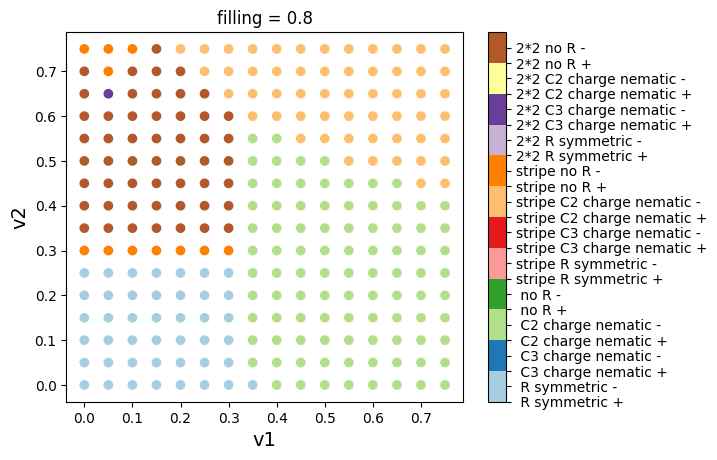

In [19]:
colorbar_ticks_combined = np.arange(len(phase_list_final))
cmap = plt.get_cmap("Paired", len(phase_list_final))
# plt.pcolormesh(e_fermi_mesh, u_mesh, phase_diagram_combined_op.T, cmap="Paired")
plt.scatter(v1_mesh, v2_mesh, c=phase_diagram_based_on_d, cmap=cmap,vmin=0, vmax=len(phase_list_final))
# plt.xlabel(r'$E_{f}$', size = '14')
plt.xlabel('v1', size = '14')
plt.ylabel('v2', size = '14')
# plt.xlim(3.8,6)
colorbar_ticks = np.arange(len(phase_list_final))
cbar = plt.colorbar()
cbar.set_ticks(colorbar_ticks)
cbar.set_ticklabels(phase_list_final)
plt.title('filling = 0.8')

In [20]:
unique_phase_index = np.unique(phase_diagram_based_on_d)
unique_phase_name = [phase_list_final[i] for i in np.int_(unique_phase_index)]
filtered_phase_diagram = np.zeros(phase_diagram_based_on_d.shape)
for i in range(v1_mesh.shape[0]):
    for j in range(v1_mesh.shape[1]):
        filtered_phase_diagram[i,j] = np.where(unique_phase_index==phase_diagram_based_on_d[i,j])[0][0]

Text(0.5, 1.0, 'filling = 0.8')

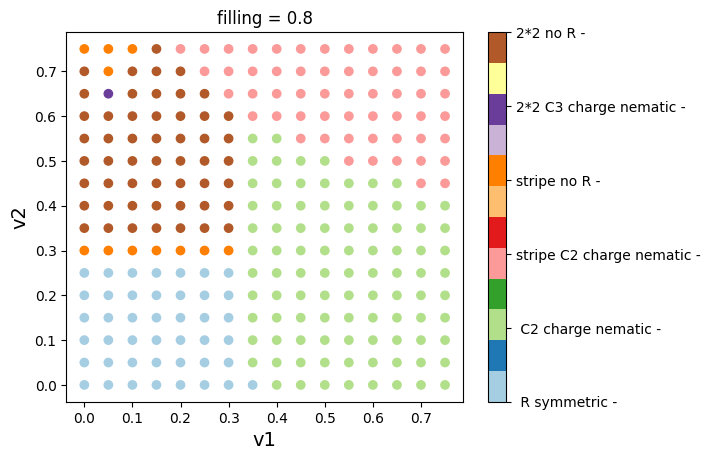

In [21]:
# from matplotlib.colors import ListedColormap

# paired = plt.get_cmap("Paired").colors
# corlor_index = [4,11,1,2,8]
# color_list = [paired[i] for i in corlor_index]

# cmap = ListedColormap(color_list)
cmap = plt.get_cmap("Paired")
plt.scatter(v1_mesh, v2_mesh, c=filtered_phase_diagram, cmap=cmap)
plt.xlabel('v1', size = '14')
plt.ylabel('v2', size = '14')
colorbar_ticks = np.arange(len(unique_phase_index))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(unique_phase_index)))
cbar.set_ticklabels(unique_phase_name)
plt.title('filling = 0.8')

In [22]:
sorted_ground_state_e[0,-2]

array([-0.31784464, -0.31784464, -0.31784464, -0.31784464, -0.31784464,
       -0.31784464, -0.31784464, -0.31784464, -0.31784464, -0.31784464,
       -0.31784464, -0.31784464, -0.31782808, -0.31782808, -0.31782808,
       -0.31744842, -0.31744842, -0.31744842, -0.31744842, -0.31744842,
       -0.31744842, -0.31744842, -0.31744842, -0.31528778, -0.31528778,
       -0.30961668, -0.30961401, -0.30961401, -0.30961401, -0.30961401,
       -0.30961401, -0.30961401, -0.30961401, -0.30961401, -0.2995029 ,
       -0.2995029 , -0.29950289, -0.29950289, -0.26973116])

# check if any of the points on the phase diagram in under convergence

In [23]:
index=np.where(np.logical_or(sorted_e_difference[:,:,0]>1E-8, sorted_c_difference[:,:,0]>1E-7))
for i in range(len(index[0])):
    print(index[0][i],index[1][i],sorted_c_difference[index[0][i],index[1][i],0], sorted_e_difference[index[0][i],index[1][i],0])

0 11 2.705512158196477e-07 5.428881788560602e-10
1 12 4.992810653248192e-07 9.758507335533295e-10
2 13 1.065683030709863e-06 1.1673106925513821e-11
3 14 5.6864489463848145e-06 3.9050518374494914e-10
3 15 2.6090109239151893e-06 1.2766903090266624e-09


### Check the degeneracy

In [24]:
# first find if there are energy states that are highly degenerate as the known ground state while in the different phase
states_index = np.where(np.logical_and(sorted_ground_state_e - sorted_ground_state_e[:,:,0][:,:,np.newaxis]<1E-4, sorted_ground_state_e - sorted_ground_state_e[:,:,0][:,:,np.newaxis]>1E-7))
# then find out the states that are in a different phase than the known ground state
states_index_len = len(states_index[0])
degenerate_state_diagram = -np.ones(final_c_difference.shape, dtype=np.int32)
for index in range(states_index_len):
    i = states_index[0][index]
    j = states_index[1][index]
    k = states_index[2][index]
    print(i,j,k)
    d_ij = sorted_density[i,j,k]
    ts_recording = np.zeros((3))
    rs_recording = np.zeros((4))
    m_recording = np.zeros((2))
    ts_diff_arr = translation_check_d(d_ij, translation_a1, translation_a2, translation_a3)
    if np.all(ts_diff_arr<threshold):
        ts_recording[0] = 1
    elif np.all(ts_diff_arr>threshold):
        ts_recording[-1] = 1
    else:
        ts_recording[1] = 1
    if ts_recording[0]>0.5:
        d_ij = d_ij[:,:3]
        c6_diff, c3_diff, c2_diff, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_uc, c_3_uc, c_2_uc)
    else:
        c6_diff_o, c3_diff_o, c2_diff_o, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_2uc, c_3_2uc, c_2_2uc)
        c6_diff_x, c3_diff_x, c2_diff_x, _ = rot_symm_m_check_d(d_ij, c_6_2uc_x, c_3_2uc_x, c_2_2uc_x)
        c6_diff_y, c3_diff_y, c2_diff_y, _ = rot_symm_m_check_d(d_ij, c_6_2uc_y, c_3_2uc_y, c_2_2uc_y)    
        c6_diff_gamma, c3_diff_gamma, c2_diff_gamma, _ = rot_symm_m_check_d(d_ij, c_6_2uc_gamma, c_3_2uc_gamma, c_2_2uc_gamma)
        c6_diff = np.min(np.abs(np.array([c6_diff, c6_diff_x, c6_diff_y, c6_diff_gamma])))
        c3_diff = np.min(np.abs(np.array([c3_diff, c3_diff_x, c3_diff_y, c3_diff_gamma])))
        c2_diff = np.min(np.abs(np.array([c2_diff, c2_diff_x, c2_diff_y, c2_diff_gamma])))
    if c6_diff<threshold:
        rs_recording[0] = 1
    elif c6_diff>threshold and c3_diff<threshold:
        rs_recording[1] = 1
    elif c2_diff<threshold and c6_diff>threshold:
        rs_recording[2] = 1
    else:
        rs_recording[3] = 1
    if np.max(np.abs(magnetism_arr)) > threshold:
        # if np.all(np.sign(np.real(magnetism_arr)) == 1) or np.all(np.sign(np.real(magnetism_arr)) == -1):
        #     m_recording[1] = 1
        # else:
        #     net_m = np.sum(np.real(magnetism_arr))
        #     if np.abs(net_m) <= threshold:
        #         m_recording[3] = 1
        #     else:
        #         m_recording[2] = 1
        m_recording[1] = 1
    else:
        m_recording[0] = 1
    phase_arr = np.kron(ts_recording,rs_recording)
    phase_arr = np.kron(phase_arr,m_recording)
    phase = np.where(phase_arr>0.5)[0][0]
    print(phase_list_final[phase])
    if phase != phase_diagram_based_on_d[i,j] and phase not in degenerate_state_diagram[i,j]:
        degenerate_state_diagram[i,j,k]=phase

0 6 3
2*2 C2 charge nematic -
0 6 4
2*2 C2 charge nematic -
0 6 5
2*2 C2 charge nematic -
0 6 6
2*2 C2 charge nematic -
0 6 7
2*2 C2 charge nematic -
0 6 8
2*2 C2 charge nematic -
0 6 9
2*2 C2 charge nematic -
0 6 10
2*2 C2 charge nematic -
0 6 11
2*2 C2 charge nematic -
0 6 12
2*2 C2 charge nematic -
0 6 13
 R symmetric -
0 6 14
 R symmetric -
0 6 15
 R symmetric -
0 6 16
 R symmetric -
0 6 17
 R symmetric -
0 6 18
 R symmetric -
0 6 19
 R symmetric -
0 6 20
 R symmetric -
0 6 21
 R symmetric -
0 6 22
 R symmetric -
0 6 23
 R symmetric -
0 6 24
 R symmetric -
0 14 12
2*2 R symmetric -
0 14 13
2*2 R symmetric -
0 14 14
2*2 R symmetric -
1 6 9
2*2 R symmetric -
1 6 10
2*2 R symmetric -
1 6 11
2*2 R symmetric -
1 6 12
2*2 R symmetric -
1 6 13
 R symmetric -
1 6 14
 R symmetric -
1 6 15
 R symmetric -
1 6 16
 R symmetric -
1 6 17
 R symmetric -
1 6 18
 R symmetric -
1 6 19
 R symmetric -
1 6 20
 R symmetric -
1 6 21
 R symmetric -
1 6 22
 R symmetric -
1 6 23
 R symmetric -
1 6 24
 R symm

In [25]:
degenerate_index = np.where(degenerate_state_diagram>0)
degenerate_index

(array([0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 6, 6, 6]),
 array([ 6,  6, 14,  6,  6,  6,  7,  7,  6,  7,  6,  7,  6, 14,  6,  6,  7,
        10, 11]),
 array([ 3, 13, 12,  9, 13, 11,  6,  7,  7,  3,  8,  4,  4, 11,  1,  6,  6,
         2,  2]))

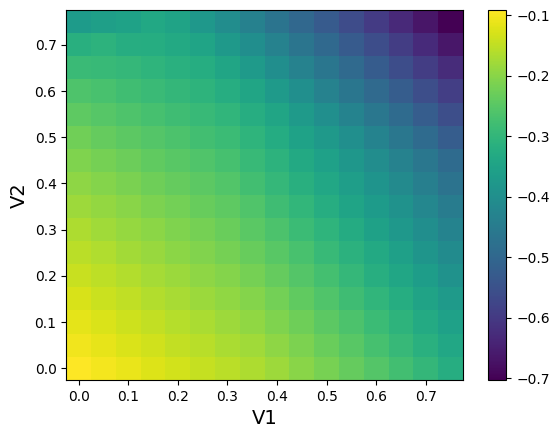

In [26]:
plt.pcolormesh(v1_mesh,v2_mesh,sorted_ground_state_e[:,:,0])
plt.xlabel('V1', size = '14')
plt.ylabel('V2', size = '14')
plt.colorbar()

In [27]:
np.mean(final_iteration)

np.float64(150.42798477564102)

In [28]:
np.max(final_iteration)

np.int32(500)

In [29]:
np.min(final_iteration)

np.int32(4)

# a better phase diagram

In [30]:
nematic_measure = np.zeros((v1_mesh.shape), np.float64)
ts_check = np.zeros((v1_mesh.shape), np.int32)
f_phase = np.zeros((v1_mesh.shape), np.int32)
f_measure = np.zeros((v1_mesh.shape), np.float64)
f_max_measure = np.zeros((v1_mesh.shape), np.float64)

threshold = 1E-2
for i in range(v1_mesh.shape[0]):
    for j in range(v1_mesh.shape[1]):
        d_ij = sorted_density[i,j,0]
        ts_diff_arr = translation_check_d(d_ij, translation_a1, translation_a2, translation_a3)
        if np.all(ts_diff_arr<threshold):
            ts_check[i,j] = 0
        elif np.all(ts_diff_arr>threshold):
            ts_check[i,j] = 2
        else:
            ts_check[i,j] = 1
        # if ts_check[i,j]==0:
        # d_ij = d_ij[:,:3]
        #     c6_diff, c3_diff, c2_diff, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_uc, c_3_uc, c_2_uc)
        # else:
        c6_diff_o, c3_diff_o, c2_diff_o, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_2uc, c_3_2uc, c_2_2uc)
        c6_diff_x, c3_diff_x, c2_diff_x, _ = rot_symm_m_check_d(d_ij, c_6_2uc_x, c_3_2uc_x, c_2_2uc_x)
        c6_diff_y, c3_diff_y, c2_diff_y, _ = rot_symm_m_check_d(d_ij, c_6_2uc_y, c_3_2uc_y, c_2_2uc_y)    
        c6_diff_gamma, c3_diff_gamma, c2_diff_gamma, _ = rot_symm_m_check_d(d_ij, c_6_2uc_gamma, c_3_2uc_gamma, c_2_2uc_gamma)
        c6_diff = np.min(np.abs(np.array([c6_diff_o, c6_diff_x, c6_diff_y, c6_diff_gamma])))
        nematic_measure[i,j] = c6_diff
        if np.max(np.abs(magnetism_arr)) > threshold:
            if np.all(magnetism_arr > threshold) or np.all(magnetism_arr < -threshold):
                f_phase[i,j] = 1
            else:
                f_phase[i,j] = 2
        else:
            f_phase[i,j] = 0
        f_measure[i,j] = np.mean(np.abs(magnetism_arr))
        f_max_measure[i,j] = np.max(np.abs(magnetism_arr))

In [31]:
u=0.75

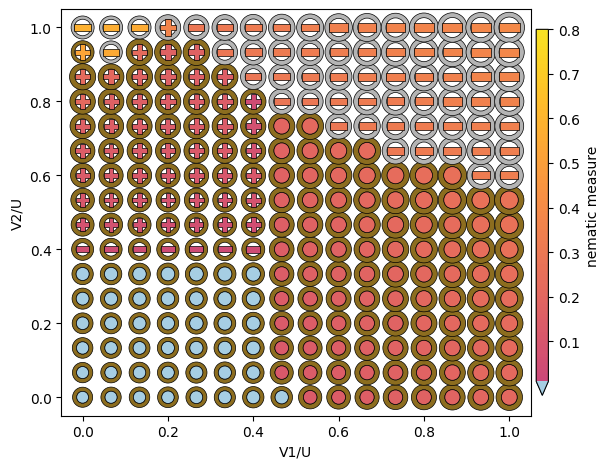

In [32]:
from functions_parameters.phase_plot import PlotConfig, plot_phase_map

CFG = PlotConfig(nem_vmax=0.8)
fig, ax = plt.subplots()
plot_phase_map(
    fig,
    ax,
    v1_mesh/u, v2_mesh/u,
    sorted_ground_state_e/4,               # [...,0] read inside
    nematic_measure,
    ts_check, f_phase,
    f_max_measure,                       # or f_measure if you prefer mean
    cfg=CFG,
)
ax.set_xlabel("V1/U")
ax.set_ylabel("V2/U")
plt.tight_layout(); plt.show()

Text(0, 0.5, 'v2')

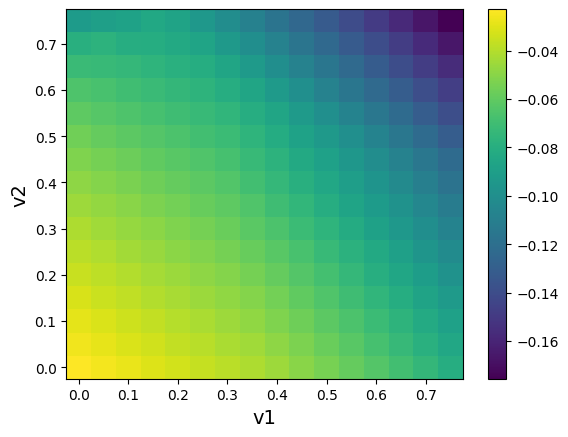

In [33]:
plt.pcolormesh(v1_mesh, v2_mesh, sorted_ground_state_e[:,:,0]/4)
plt.colorbar()
plt.xlabel('v1', size = '14')
plt.ylabel('v2', size = '14')